In [1]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
import json
import time

In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (8,5)

In [3]:
def read_as_json(file_name):
    with open(file_name) as json_file:
        data = json.load(json_file)
    return data

In [4]:
movies = pd.read_csv('ml-latest-small/movies.csv', low_memory=False)
movies['genres'] = movies['genres'].apply(lambda x: x.replace('|',', '))
ratings = pd.read_csv('ml-latest-small/ratings.csv', low_memory=False, names=['userId', 'movieId', 'rating','timestamp'])
ratings = ratings.drop(columns=['timestamp'])

In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"Adventure, Animation, Children, Comedy, Fantasy"
1,2,Jumanji (1995),"Adventure, Children, Fantasy"
2,3,Grumpier Old Men (1995),"Comedy, Romance"
3,4,Waiting to Exhale (1995),"Comedy, Drama, Romance"
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
print(len(ratings))
ratings.head()

100836


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [7]:
v1 = read_as_json('01.json')
v2 = read_as_json('02.json')
v3 = read_as_json('03.json')
v4 = read_as_json('04.json')
v5 = read_as_json('05.json')
v6 = read_as_json('06.json')
v7 = read_as_json('07.json')
v8 = read_as_json('08.json')
v9 = read_as_json('09.json')
v10 = read_as_json('10.json')

print("Tamanhos: {}, {}, {}, {}, {}, {}, {}, {}, {} e {}".format(len(v1),len(v2),len(v3),len(v4),len(v5),len(v6),len(v7),len(v8),len(v9),len(v10)))

Tamanhos: 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000 e 742


In [8]:
total = v1 + v2 + v3 + v4 + v5 + v6 + v7 + v8 + v9 + v10 
print(len(total))

9742


In [9]:
"""
Calculando a média, mediana e moda de cada filmes e adicionando esse valores no dicionário da variável total
"""
count=0

for item in total:
    if len(item['ratings']) < 1:
        my_mean = 'NO MEAN'
        my_median = 'NO MEDIAN'
        my_mode = 'NO MODE'
        my_desvio = 'NO DESVIO'
    else:
        my_aux = pd.Series(item['ratings'])
        my_mean = my_aux.mean()
        my_median = my_aux.median()
        my_mode = my_aux.mode()
        my_desvio = my_aux.std()
        
#         my_mode = statistics.mode(item['ratings'])
    
    item['mean'] = my_mean
    item['median'] = my_median
    item['mode'] = my_mode[0]
    item['desvio'] = my_desvio

In [10]:
print(total[41])

{'movieId': 45, 'ratings': [3.0, 3.0, 3.5, 4.0, 3.0, 2.5, 4.0, 3.0, 3.0, 2.0, 3.0, 4.0, 2.0, 2.0, 4.5, 3.0, 3.0, 2.5, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.5, 5.0, 5.0, 2.5, 5.0, 4.0], 'counter': 32, 'acc': 106.0, 'mean': 3.3125, 'median': 3.0, 'mode': 3.0, 'desvio': 0.8303710791159926}


In [11]:
with open('all.json', 'w') as json_file:  
    json.dump(total, json_file)

In [12]:
"""
Serão definidos 5 Grupos de filmes, tal que:

    G1, filmes bastante avaliados, tq, ratings(G1) > 100
    G2, filmes muito avaliados, tq, 100 >= ratings(G2) > 50
    G3, filmes razoavelmente avaliados, tq, 50 >= ratings(G3) > 20
    G4, filmes pouco avaliados, tq, 20 >= ratings(G4) > 5
    G5, filmes pouqíssimo avaliados, tq, 5 >= ratings(G5)
"""

G1 = []
G2 = []
G3 = []
G4 = []
G5 = []

for item in total:
    if item['counter'] > 100:
        G1.append(item)
    elif 100 >= item['counter'] > 50:
        G2.append(item)
    elif 50 >= item['counter'] > 20:
        G3.append(item)
    elif 20 >= item['counter'] > 5:
        G4.append(item)
    else:
        G5.append(item)

In [13]:
print("Tamanho dos grupos: G1={}, G2={}, G3={}, G4={} e G5={}".format(len(G1), len(G2), len(G3), len(G4), len(G5)))

Tamanho dos grupos: G1=134, G2=302, G3=799, G4=2033 e G5=6474


In [14]:
data_G1 = []
data_G2 = []
data_G3 = []
data_G4 = []
data_G5 = []

for item in G1:
    data_G1 += item['ratings']
    
for item in G2:
    data_G2 += item['ratings']
    
for item in G3:
    data_G3 += item['ratings']
    
for item in G4:
    data_G4 += item['ratings']
    
for item in G5:
    data_G5 += item['ratings']
    
print("Tamanho data_G1={}, data_G2={}, data_G3={}, data_G4={}, data_G5={} e TOTAL={}".format(len(data_G1), len(data_G2), 
                                                                                        len(data_G3), len(data_G4), 
                                                                                        len(data_G5), 
                                                                   len(data_G1)+len(data_G2)+len(data_G3)+len(data_G4)+len(data_G5) ))

# print(G1[3])

Tamanho data_G1=19788, data_G2=20872, data_G3=25998, data_G4=21706, data_G5=12472 e TOTAL=100836


[134, 302, 799, 2033, 6474]


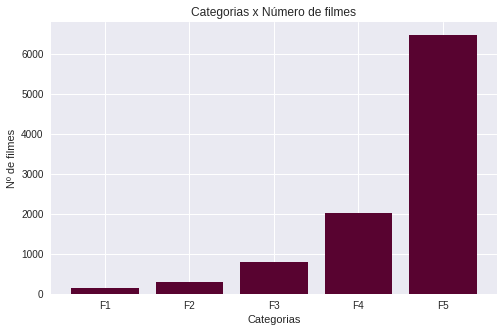

<Figure size 576x360 with 0 Axes>

In [15]:
categorias = ['F1', 'F2', 'F3', 'F4', 'F5']
filmes = [len(G1), len(G2), len(G3), len(G4), len(G5)]

print(filmes)

plt.bar(categorias, filmes, color='#580330')
plt.xticks(categorias)
plt.ylabel('Nº de filmes')
plt.xlabel('Categorias')
plt.title('Categorias x Número de filmes')

plt.show()
plt.savefig(fname='categ_vs_movies.png', format='png')

[19788, 20872, 25998, 21706, 12472]


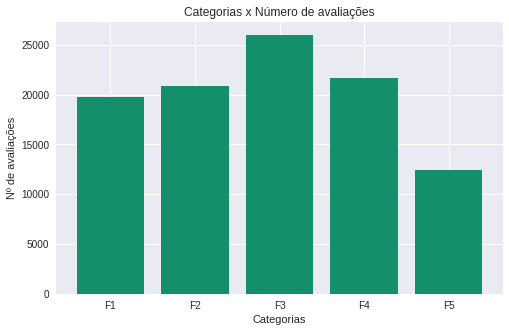

In [16]:
categorias = ['F1', 'F2', 'F3', 'F4', 'F5']
avaliacoes = [len(data_G1), len(data_G2), len(data_G3), len(data_G4), len(data_G5)]

print(avaliacoes)

plt.bar(categorias, avaliacoes, color='#138F6A')
plt.xticks(categorias)
plt.ylabel('Nº de avaliações')
plt.xlabel('Categorias')
plt.title('Categorias x Número de avaliações')

plt.show()

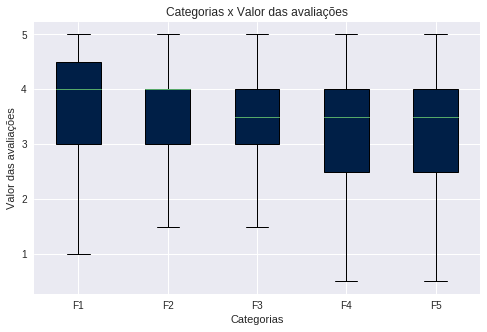

In [17]:
box_plot_data=[data_G1, data_G2, data_G3, data_G4, data_G5]

fig1, ax1 = plt.subplots()
ax1.set_title('Categorias x Valor das avaliações')
ax1.set_xlabel('Categorias')
ax1.set_ylabel('Valor das avaliações')
box = ax1.boxplot(box_plot_data,patch_artist=True,labels=['F1','F2','F3','F4','F5'])

colors = ['#001f47', '#001f47', '#001f47', '#001f47', '#001f47']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    

plt.show()

In [7]:
my_list = []
for index, row in movies.iterrows():
    aux = row.genres.split()
    for item in aux:
        if item not in my_list:
            my_list.append(item)

my_list

['Adventure,',
 'Animation,',
 'Children,',
 'Comedy,',
 'Fantasy',
 'Romance',
 'Drama,',
 'Comedy',
 'Action,',
 'Crime,',
 'Thriller',
 'Children',
 'Action',
 'Horror',
 'Drama',
 'Horror,',
 'Mystery,',
 'Sci-Fi',
 'Fantasy,',
 'Sci-Fi,',
 'War',
 'Musical,',
 'Crime',
 'Documentary',
 'Musical',
 'Mystery',
 'IMAX',
 'Romance,',
 'Thriller,',
 'Western',
 'Film-Noir,',
 'War,',
 'Adventure',
 'Film-Noir',
 'Documentary,',
 'Animation',
 'Western,',
 '(no',
 'genres',
 'listed)']

In [9]:
print(len(my_list))
my_list[37] = "(no genres listed)"
genres = my_list[0:38]

for item in genres:
    item = item.replace(',','')
    print(item)
print(len(genres))
genres

40
Adventure
Animation
Children
Comedy
Fantasy
Romance
Drama
Comedy
Action
Crime
Thriller
Children
Action
Horror
Drama
Horror
Mystery
Sci-Fi
Fantasy
Sci-Fi
War
Musical
Crime
Documentary
Musical
Mystery
IMAX
Romance
Thriller
Western
Film-Noir
War
Adventure
Film-Noir
Documentary
Animation
Western
(no genres listed)
38


['Adventure,',
 'Animation,',
 'Children,',
 'Comedy,',
 'Fantasy',
 'Romance',
 'Drama,',
 'Comedy',
 'Action,',
 'Crime,',
 'Thriller',
 'Children',
 'Action',
 'Horror',
 'Drama',
 'Horror,',
 'Mystery,',
 'Sci-Fi',
 'Fantasy,',
 'Sci-Fi,',
 'War',
 'Musical,',
 'Crime',
 'Documentary',
 'Musical',
 'Mystery',
 'IMAX',
 'Romance,',
 'Thriller,',
 'Western',
 'Film-Noir,',
 'War,',
 'Adventure',
 'Film-Noir',
 'Documentary,',
 'Animation',
 'Western,',
 '(no genres listed)']

In [10]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"Adventure, Animation, Children, Comedy, Fantasy"
1,2,Jumanji (1995),"Adventure, Children, Fantasy"
2,3,Grumpier Old Men (1995),"Comedy, Romance"
3,4,Waiting to Exhale (1995),"Comedy, Drama, Romance"
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
genres_counter = []
for genre in genres:
    count = 0
    aux = {}
    for index, row in movies.iterrows():
        if genre in row.genres:
            count += 1
    aux['genre'] = genre
    aux['count'] = count
    genres_counter.append(aux)
    
genres_counter

[{'genre': 'Adventure,', 'count': 1219},
 {'genre': 'Animation,', 'count': 555},
 {'genre': 'Children,', 'count': 581},
 {'genre': 'Comedy,', 'count': 2436},
 {'genre': 'Fantasy', 'count': 779},
 {'genre': 'Romance', 'count': 1596},
 {'genre': 'Drama,', 'count': 2386},
 {'genre': 'Comedy', 'count': 3756},
 {'genre': 'Action,', 'count': 1768},
 {'genre': 'Crime,', 'count': 989},
 {'genre': 'Thriller', 'count': 1894},
 {'genre': 'Children', 'count': 664},
 {'genre': 'Action', 'count': 1828},
 {'genre': 'Horror', 'count': 978},
 {'genre': 'Drama', 'count': 4361},
 {'genre': 'Horror,', 'count': 635},
 {'genre': 'Mystery,', 'count': 416},
 {'genre': 'Sci-Fi', 'count': 980},
 {'genre': 'Fantasy,', 'count': 427},
 {'genre': 'Sci-Fi,', 'count': 358},
 {'genre': 'War', 'count': 382},
 {'genre': 'Musical,', 'count': 122},
 {'genre': 'Crime', 'count': 1199},
 {'genre': 'Documentary', 'count': 440},
 {'genre': 'Musical', 'count': 334},
 {'genre': 'Mystery', 'count': 573},
 {'genre': 'IMAX', 'count

In [12]:
with open('genres_counter.json', 'w') as json_file:  
    json.dump(genres_counter, json_file)

In [14]:
# x = [u'INFO', u'CUISINE', u'TYPE_OF_PLACE', u'DRINK', u'PLACE', u'MEAL_TIME', u'DISH', u'NEIGHBOURHOOD']
# y = [160, 167, 137, 18, 120, 36, 155, 130]

# fig, ax = plt.subplots()    
# width = 0.75 # the width of the bars 
# ind = np.arange(len(y))  # the x locations for the groups
# ax.barh(ind, y, width, color="blue")
# ax.set_yticks(ind+width/2)
# ax.set_yticklabels(x, minor=False)
# plt.title('title')
# plt.xlabel('x')
# plt.ylabel('y')

# for i, v in enumerate(y):
#     ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

# plt.show()

['Adventure,', 'Animation,', 'Children,', 'Comedy,', 'Fantasy', 'Romance', 'Drama,', 'Comedy', 'Action,', 'Crime,', 'Thriller', 'Children', 'Action', 'Horror', 'Drama', 'Horror,', 'Mystery,', 'Sci-Fi', 'Fantasy,', 'Sci-Fi,', 'War', 'Musical,', 'Crime', 'Documentary', 'Musical', 'Mystery', 'IMAX', 'Romance,', 'Thriller,', 'Western', 'Film-Noir,', 'War,', 'Adventure', 'Film-Noir', 'Documentary,', 'Animation', 'Western,', '(no genres listed)']


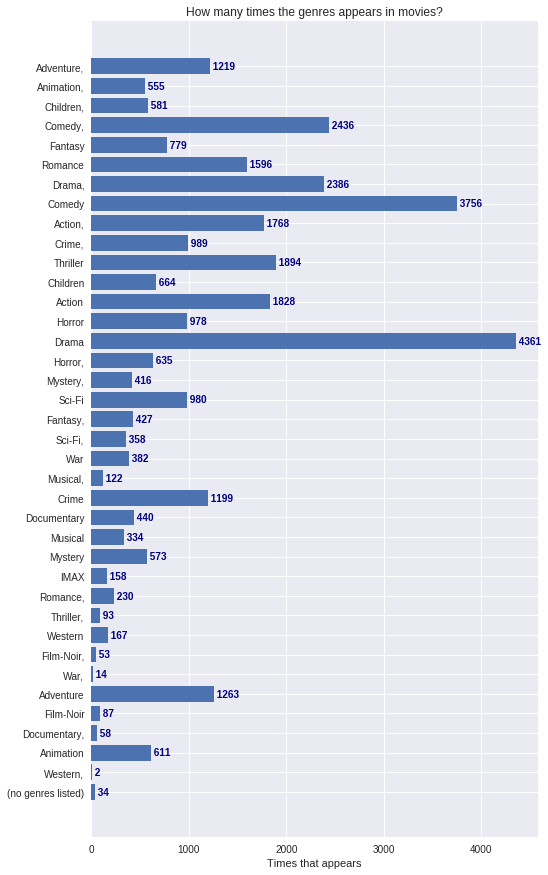

In [16]:
plt.rcParams['figure.figsize'] = (8,15)

fig, ax = plt.subplots()

repeats = []
for item in genres_counter:
    repeats.append(item['count'])

# Data to plot
print(genres)
genres_label = genres
y_pos = np.arange(len(genres_label))
repeats_label = repeats


ax.barh(y_pos, repeats_label, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(genres_label)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Times that appears')
ax.set_title('How many times the genres appears in movies?')

for i, v in enumerate(repeats_label):
#     ax.text(v + 3, i + .25, str(v), color='navy', fontweight='bold')
    ax.text(v, i, " "+str(v), color='navy', va='center', fontweight='bold') 

plt.show()

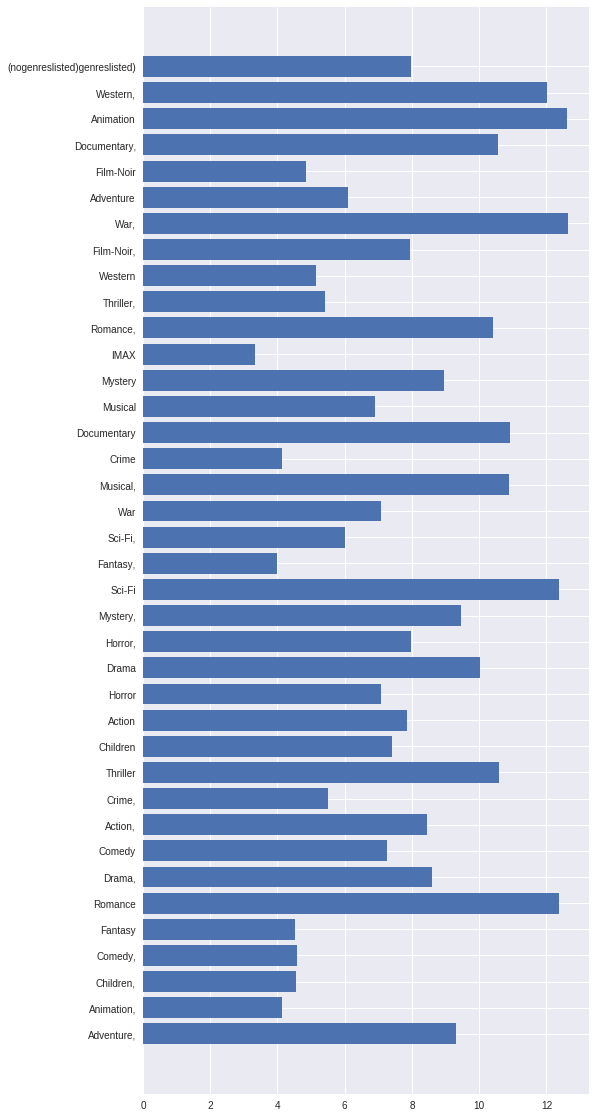

In [58]:
plt.rcParams['figure.figsize'] = (8,20)

# Make fake dataset
bars = genres
height = 3 + 10 * np.random.rand(len(bars))
y_pos = np.arange(len(bars))

# Create horizontal bars
plt.barh(y_pos, height)

# Create names on the y-axis
plt.yticks(y_pos, bars)

# Show graphic
plt.show()

NameError: name 'x' is not defined

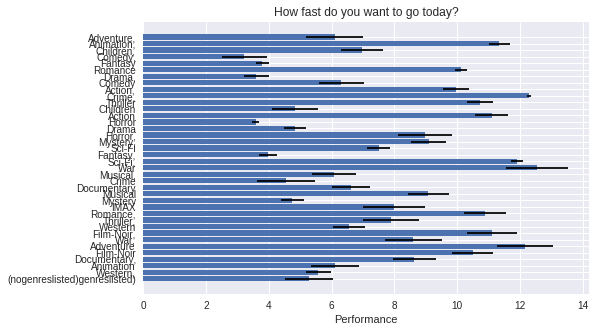

In [55]:
fig, ax = plt.subplots()

# Example data
people = genres
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')
ax = x.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Average Trip Duration (Seconds)", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Start Station", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))